In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import seaborn as sns

## Загрузка данных

In [2]:
from data import load_dataset

dir = '/Users/gurasog/Desktop/Master/17_ALICE/dataset_kids'

data, annotations = load_dataset(dir)

Данные компоненты хранятся в виде класса IC, который содержит сигнал, разбитый на эпохи и веса каналов.

In [3]:
i_component = data['IC000369']

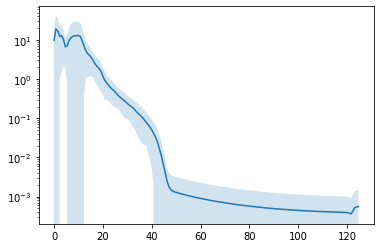

In [4]:
i_component.plot_psd()

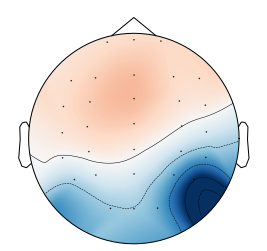

In [5]:
i_component.plot_topomap()

## Построение признаков

Определяем дополнительные признаки.

In [6]:
def compute_MWD(ic) -> float:
    return ic.weights.abs().max() / ic.weights.abs().mean()

In [7]:

FC = {'fp1','fpz','fp2','f3','fz','f4','fc3','fcz','fc4','c3','cz','c4'}
FC_not={'f7','ft7','t3','tp7','t5','t6','tp8','t4','ft8','f8','cp3','cpz','cp4','p3','pz','p4','o1','oz','o2'}
FP= {'c3','cz','c4','cp3','cpz','cp4','p3','pz','p4','o1','oz','o2'}
FP_not={'f7','ft7','t3','tp7','t5','t6','tp8','t4','ft8','f8','fp1','fpz','fp2','f3','fz','f4','fc3','fcz','fc4'}

In [8]:

def compute_AT(ic) -> float:
    """
    Args:
        ic (IC): indepentent component.

    Returns:
        float: Spatial Average Difference feature.
    """
    return np.abs(ic.select_weights(FC).mean()) - np.abs(ic.select_weights(FC_not).mean())

def compute_MT(ic) -> float:
    """
    Args:
        ic (IC): indepentent component.

    Returns:
        float: Spatial Average Difference feature.
    """
    return np.abs(ic.select_weights(FP).mean()) - np.abs(ic.select_weights(FP_not).mean())

def compute_AMALB(ic)  -> float:
    
    freqs, psd=ic.psd(verbose=False)
    
    alphs_inds=np.where((freqs>=6)&(freqs<=12))


    alphs_inds_not=np.where((freqs<6)|(freqs>12))
    
    mean_psd = psd.mean(axis=0)
    
    return np.mean(mean_psd[alphs_inds])/np.mean(mean_psd[alphs_inds_not])
    
    

In [9]:
build_feature_df?

Object `build_feature_df` not found.


Указываем дополнителные признаки при формировании матрицы объект-признак.

In [10]:
from features import build_feature_df

features = build_feature_df(data, default=False, custom_features={'AT': compute_AT,
                                                                 'MT':compute_MT,
                                                                 'AMALB':compute_AMALB})
features

,AT,MT,AMALB
IC000262,0.532586,-0.436746,1.011637
IC000263,0.117395,0.040816,2.849186
IC000264,0.156479,-0.006563,3.377169
IC000265,-0.015456,0.105652,3.772572
IC000266,-0.036227,0.126880,3.964019
...,...,...,...
IC000877,0.065716,0.016142,3.993653
IC000878,-0.005558,0.079040,4.264880
IC000879,0.049253,-0.022909,4.072748
IC000880,-0.050189,0.038057,4.659919


In [11]:
features

,AT,MT,AMALB
IC000262,0.532586,-0.436746,1.011637
IC000263,0.117395,0.040816,2.849186
IC000264,0.156479,-0.006563,3.377169
IC000265,-0.015456,0.105652,3.772572
IC000266,-0.036227,0.126880,3.964019
...,...,...,...
IC000877,0.065716,0.016142,3.993653
IC000878,-0.005558,0.079040,4.264880
IC000879,0.049253,-0.022909,4.072748
IC000880,-0.050189,0.038057,4.659919


In [12]:
from data import build_target_df

targets = build_target_df(annotations)
targets = targets.loc[:, targets.any(axis=0)]
targets

,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_muscles,flag_heart,flag_line_noise,flag_ch_noise
ic_id,,,,,,,,,,
IC000262,0,0,0,1,1,1,0,0,0,0
IC000263,1,0,0,1,0,0,1,0,0,1
IC000264,1,0,0,1,0,0,0,1,0,1
IC000265,1,0,0,0,1,0,1,0,0,1
IC000266,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
IC000877,1,0,0,0,0,0,1,1,0,0
IC000878,1,0,0,0,0,0,0,1,0,0
IC000879,1,0,0,0,0,0,1,1,0,0


In [11]:
build_target_df?

In [13]:
from data import build_target_df

targets = build_target_df(annotations)
targets = targets.loc[:, targets.any(axis=0)]
targets

,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_muscles,flag_heart,flag_line_noise,flag_ch_noise
ic_id,,,,,,,,,,
IC000262,0,0,0,1,1,1,0,0,0,0
IC000263,1,0,0,1,0,0,1,0,0,1
IC000264,1,0,0,1,0,0,0,1,0,1
IC000265,1,0,0,0,1,0,1,0,0,1
IC000266,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
IC000877,1,0,0,0,0,0,1,1,0,0
IC000878,1,0,0,0,0,0,0,1,0,0
IC000879,1,0,0,0,0,0,1,1,0,0


In [14]:
for i in range(len(targets.columns)):
            
            col=targets.columns
            targets[col] = targets[col].astype(bool)
            


In [15]:
targets

,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_muscles,flag_heart,flag_line_noise,flag_ch_noise
ic_id,,,,,,,,,,
IC000262,False,False,False,True,True,True,False,False,False,False
IC000263,True,False,False,True,False,False,True,False,False,True
IC000264,True,False,False,True,False,False,False,True,False,True
IC000265,True,False,False,False,True,False,True,False,False,True
IC000266,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
IC000877,True,False,False,False,False,False,True,True,False,False
IC000878,True,False,False,False,False,False,False,True,False,False
IC000879,True,False,False,False,False,False,True,True,False,False


Вычислим t-статистики.

In [16]:
from scipy.stats import ttest_ind

def compute_ttest(features, targets):
    t_stats = pd.DataFrame(index=features.columns)
    p_vals = pd.DataFrame(index=features.columns)
    for t_name in targets:
        t_stats[t_name], p_vals[t_name] = ttest_ind(features.loc[targets[t_name], :], features.loc[~targets[t_name], :], axis=0)
    return t_stats, p_vals

t_statistics, p_values = compute_ttest(features, targets)

In [17]:
t_statistics

,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_muscles,flag_heart,flag_line_noise,flag_ch_noise
AT,-0.666130,-2.740454,0.169416,3.462744,4.458178,6.251061,-3.637224,-0.634486,0.191864,-2.007581
MT,4.737103,4.941515,4.634414,-3.456675,-4.828722,-8.090543,-0.664467,2.721695,-0.325020,-1.186856
AMALB,7.750607,13.890172,11.292659,-4.088992,-3.434967,-4.458860,-6.903963,3.257460,-1.220970,-5.918004


In [18]:
p_values

,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_muscles,flag_heart,flag_line_noise,flag_ch_noise
AT,5.055767e-01,6.312729e-03,8.655250e-01,0.000572,0.000010,7.602193e-10,2.985894e-04,0.525999,0.847912,4.512271e-02
MT,2.691838e-06,9.994458e-07,4.368431e-06,0.000584,0.000002,3.154777e-15,5.066394e-01,0.006678,0.745276,2.357405e-01
AMALB,3.774615e-14,2.260899e-38,5.142138e-27,0.000049,0.000632,9.787008e-06,1.257849e-11,0.001186,0.222563,5.402041e-09


Построим violin plots для каждой метки. Для удобства отнормируем значения каждого признака по отдельности.

In [19]:
from sklearn.preprocessing import minmax_scale

features_scaled = pd.DataFrame(minmax_scale(features), columns=features.columns, index=features.index)

violin_df = features_scaled.stack() \
                           .reset_index() \
                           .rename(columns={'level_0': 'ic_id', 'level_1': 'feature', 0: 'value'}) \
                           .merge(targets, on='ic_id')
violin_df

,ic_id,feature,value,flag_brain,flag_alpha,flag_mu,flag_eyes,flag_eyes_h,flag_eyes_v,flag_muscles,flag_heart,flag_line_noise,flag_ch_noise
0,IC000262,AT,0.992602,False,False,False,True,True,True,False,False,False,False
1,IC000262,MT,0.000000,False,False,False,True,True,True,False,False,False,False
2,IC000262,AMALB,0.013316,False,False,False,True,True,True,False,False,False,False
3,IC000263,AT,0.433127,True,False,False,True,False,False,True,False,False,True
4,IC000263,MT,0.627826,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,IC000880,MT,0.624199,True,False,False,False,False,False,True,True,False,False
1856,IC000880,AMALB,0.104912,True,False,False,False,False,False,True,True,False,False
1857,IC000881,AT,0.265091,False,False,False,False,False,False,True,True,False,True
1858,IC000881,MT,0.567035,False,False,False,False,False,False,True,True,False,True


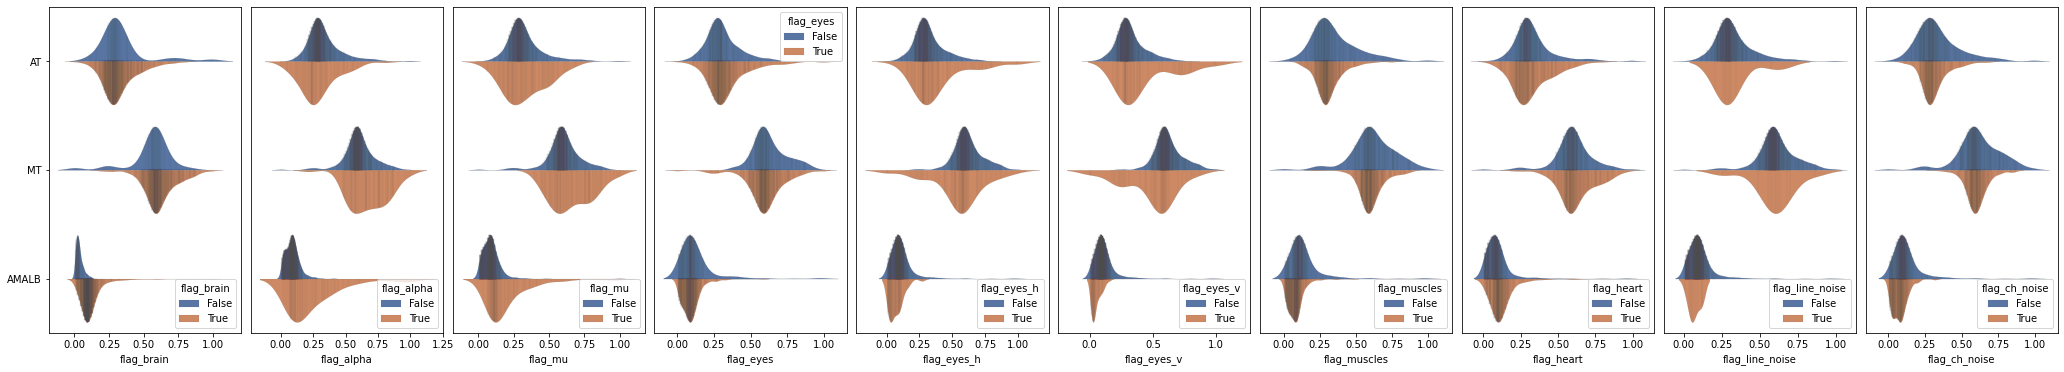

In [20]:
fig, axes = plt.subplots(1, len(targets.columns), figsize=(36, 2 * len(features.columns)))

for target, ax in zip(targets, axes):
    sns.violinplot(x='value', y='feature', hue=target,
                   data=violin_df,
                   order=features,
                   linewidth=0.1,
                   palette='deep',
                   split=True,
                   inner='stick',
                   orient='h',
                   scale='width',
                   ax=ax)
    ax.set_xlabel(target)
    ax.set_ylabel('')

for ax in axes[1:]:
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [21]:
print('lol')

lol


Построим ROC и PR кривые.

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay

def plot_roc_curve(ax, y_true, y_pred, title=None, lw=2, color='darkorange'):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    ax.set_title(title)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax, color=color, lw=lw)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    

def plot_pr_curve(ax, y_true, y_pred, title=None, lw=2, color='darkorange'):
    p, rec, _ = precision_recall_curve(y_true, y_pred)
    avg_prec = average_precision_score(y_true, y_pred)
    ax.set_title(title)
    PrecisionRecallDisplay(precision=p, recall=rec,
                           average_precision=avg_prec).plot(ax=ax, color=color, lw=lw)


def plot_curves(y_true, y_pred, feature_name=None, figsize=(13, 5), **kwargs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(feature_name)
    plot_roc_curve(ax1, y_true, y_pred, 'ROC curve', **kwargs)
    plot_pr_curve(ax2, y_true, y_pred, 'PR curve', **kwargs)


In [23]:
from itertools import product

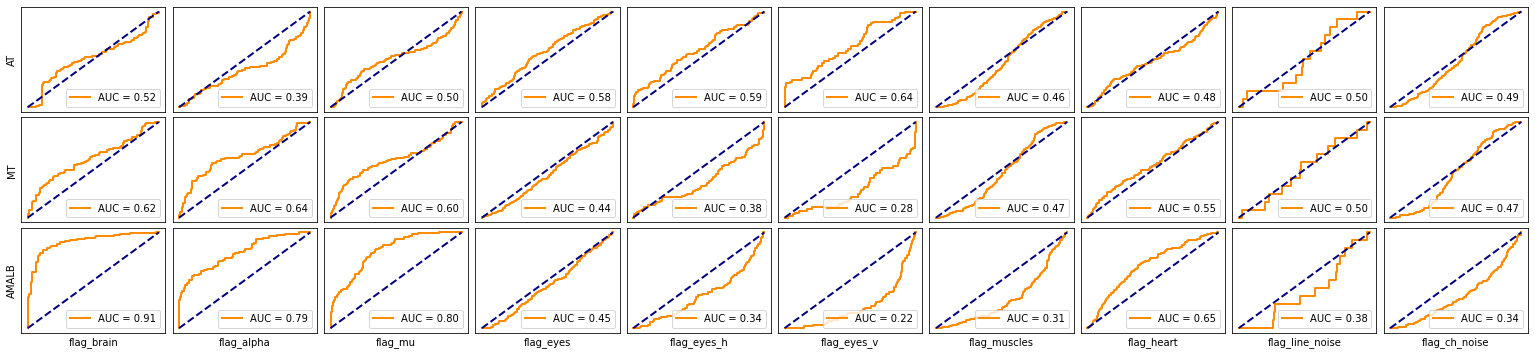

In [24]:
fig, axes = plt.subplots(len(features.columns), len(targets.columns), figsize=(27, 2 * len(features.columns)))

for (f_name, t_name), ax in zip(product(features, targets), axes.ravel()):
    plot_roc_curve(ax, targets[t_name], features[f_name])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

for f_idx, f_name in enumerate(features):
    axes[f_idx, 0].set_ylabel(f_name)

for t_idx, t_name in enumerate(targets):
    axes[-1, t_idx].set_xlabel(t_name)

plt.subplots_adjust(wspace=0.05, hspace=0.05)

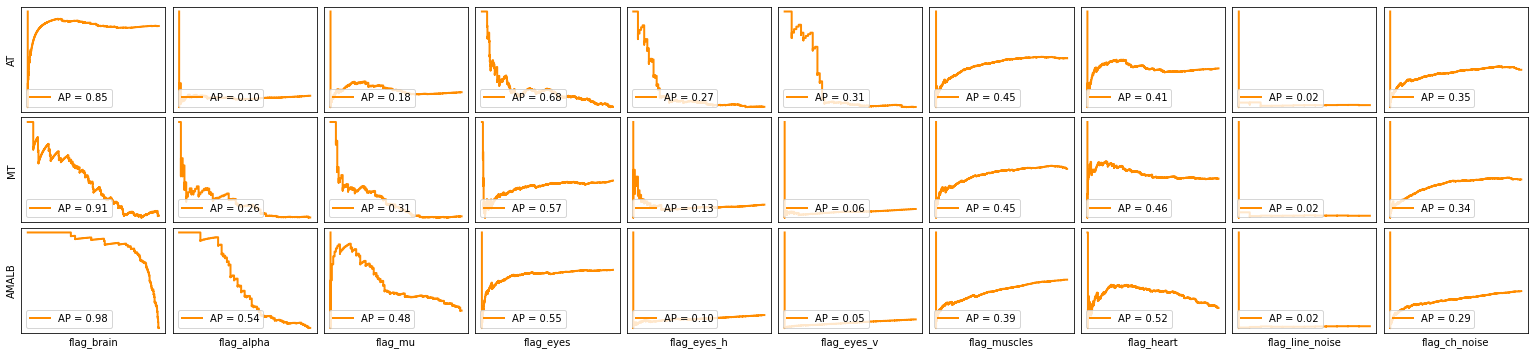

In [25]:
fig, axes = plt.subplots(len(features.columns), len(targets.columns), figsize=(27, 2 * len(features.columns)))

for (f_name, t_name), ax in zip(product(features, targets), axes.ravel()):
    plot_pr_curve(ax, targets[t_name], features[f_name])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

for f_idx, f_name in enumerate(features):
    axes[f_idx, 0].set_ylabel(f_name)

for t_idx, t_name in enumerate(targets):
    axes[-1, t_idx].set_xlabel(t_name)

plt.subplots_adjust(wspace=0.05, hspace=0.05)

## Обучение модели

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, plot_roc_curve

In [27]:
lr = LogisticRegression(solver='liblinear')

Вертикалные движения глаз.

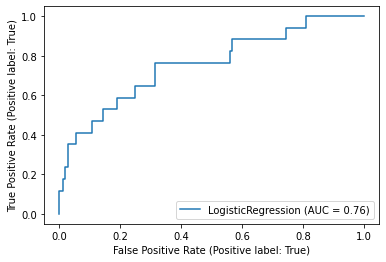

In [28]:
y = targets['flag_eyes_v']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

lr.fit(X_train, y_train)
plot_roc_curve(lr, X_test, y_test)

Отсортируем признаки по убыванию веса.

In [29]:
features.columns[lr.coef_.argsort().ravel()[::-1]]

Index(['AT', 'AMALB', 'MT'], dtype='object')

Горизонтальные движения глаз.

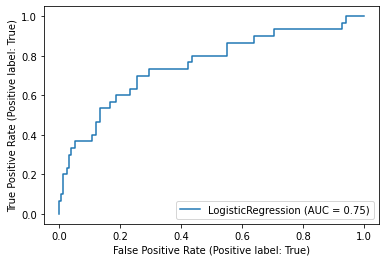

In [30]:
y = targets['flag_eyes_h']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

lr.fit(X_train, y_train)
plot_roc_curve(lr, X_test, y_test)

Отсортируем признаки по убыванию веса.

In [31]:
features.columns[lr.coef_.argsort().ravel()[::-1]]

Index(['AT', 'AMALB', 'MT'], dtype='object')

In [32]:
y = targets['flag_alpha']

In [33]:
len(y[y==True])

ic_id
IC000267    True
IC000270    True
IC000271    True
IC000273    True
IC000280    True
            ... 
IC000780    True
IC000782    True
IC000792    True
IC000793    True
IC000830    True
Name: flag_alpha, Length: 74, dtype: bool

In [35]:
y = targets['flag_mu']
len(y[y==True])
    

97

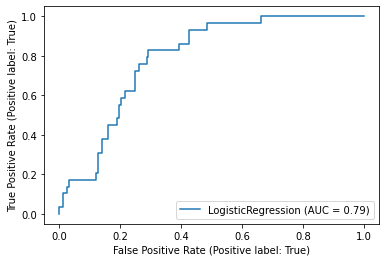

In [36]:
y = targets['flag_mu']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

lr.fit(X_train, y_train)
plot_roc_curve(lr, X_test, y_test)

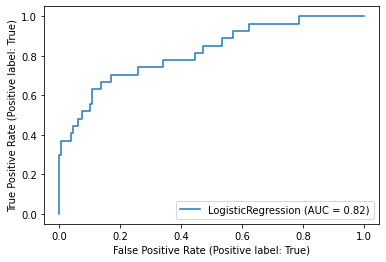

In [37]:
y = targets['flag_alpha']

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

lr.fit(X_train, y_train)
plot_roc_curve(lr, X_test, y_test)

Отсортируем признаки по убыванию веса.

In [23]:
features.columns[lr.coef_.argsort().ravel()[::-1]]

Index(['SED', 'SVD', 'SAD', 'K', 'MEV', 'MWD', 'MIF'], dtype='object')